In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [3]:
df1.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
rows = len(df1["SibSp"])
percent = (df1["SibSp"].value_counts().get(0) / rows)  * 100 
print("The percent of alone passengers is: {:.2f} % ".format(percent) )

The percent of alone passengers is: 68.24 % 


In [7]:
(df1[(df1["Pclass"] == 1) & (df1["Sex"] == "female") ]["Survived"] == 1).value_counts()


True     91
False     3
Name: Survived, dtype: int64

#### It is intresting to note that females in a high class seat had a much higher survival rate 
#### this will be important for our ML model 

In [8]:
pd.isna(df1).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

#### Clearly there are missing values in the Age, Cabin and Embarked columns 
#### i will solve the age column by replacing the nan with the mean  so that we can get rid of noises

In [9]:

mean = df1["Age"].mean()
df1["Age"] = df1["Age"].apply(lambda x : mean if(pd.isna(x)) else (x))
pd.isna(df1).any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [10]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
import seaborn as sns
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## i will create a column combining Pclass and sex 

In [12]:
df1["comb"] = df1["Sex"] +" At "+df1["Pclass"].astype(str) 

<Axes: xlabel='Survived', ylabel='count'>

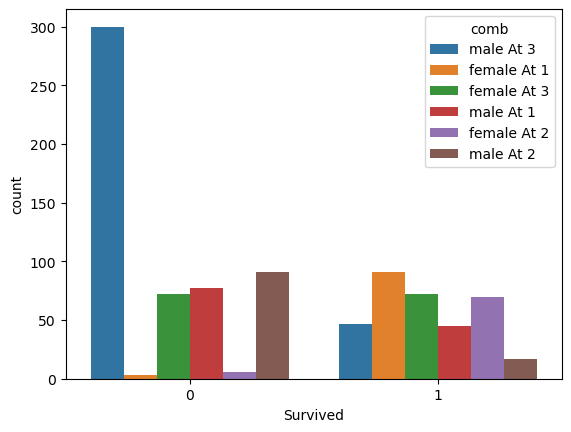

In [13]:
 sns.countplot(x = "Survived" , hue = "comb" , data = df1)

## From this bar graph, we proved that Female at Pclass1 had the highest survival rate

## Both sex and Pclass are highly corrlated to surrviving

In [14]:
class3 = len(df1[df1["Pclass"] ==3])
class2 = len(df1[df1["Pclass"] ==2])
class1 = len(df1[df1["Pclass"] ==1])
allClases = len(df1)

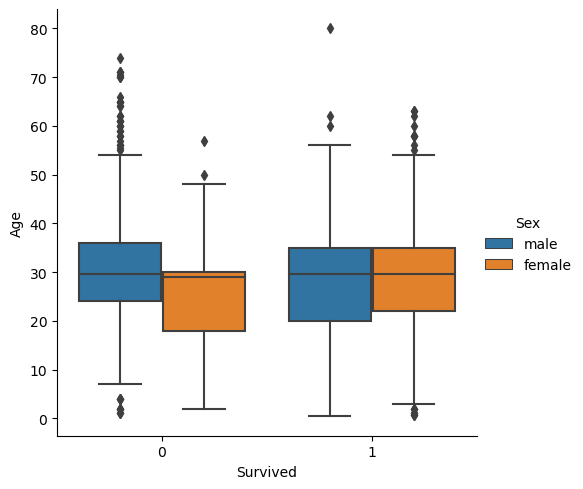

In [40]:
sns.catplot(data = df1, x= "Survived", y = "Age", kind = "box" , hue ="Sex")

## The age column has too many noises to contribute to our predections

In [1]:
dfn = df1[["Age", "SibSp" , "Parch", "Fare"] ]
dfn.corr()


NameError: name 'df1' is not defined

In [17]:
df1.groupby("Survived").mean()[dfn.columns]

,Age,SibSp,Parch,Fare
Survived,,,,
0,30.415100,0.553734,0.329690,22.117887
1,28.549778,0.473684,0.464912,48.395408


In [18]:
from scipy.stats import pointbiserialr

corr, _ = pointbiserialr(df1['Age'], df1['Survived'])
print('Point Biserial Correlation Coefficient is: %.3f' % corr)

Point Biserial Correlation Coefficient is: -0.070


### There is a small corrlation betwen age and surviving rate 

In [19]:
import scipy.stats as stats

# Assuming 'num_var' is numerical and 'cat_var' is categorical
fval, pval = stats.f_oneway(df1['Age'][df1['Survived'] == 0],
                            df1['Age'][df1['Survived'] == 1 ],
                          )

print('ANOVA results: F=', fval, ', P=', pval)

ANOVA results: F= 4.353516089078488 , P= 0.03721708372683364


### The F value indicates that the corlation is very weak. Therefore, age column will be ignored

In [28]:
df1[['SibSp', 'Survived']].corr()

,SibSp,Survived
SibSp,1.000000,-0.035322
Survived,-0.035322,1.000000


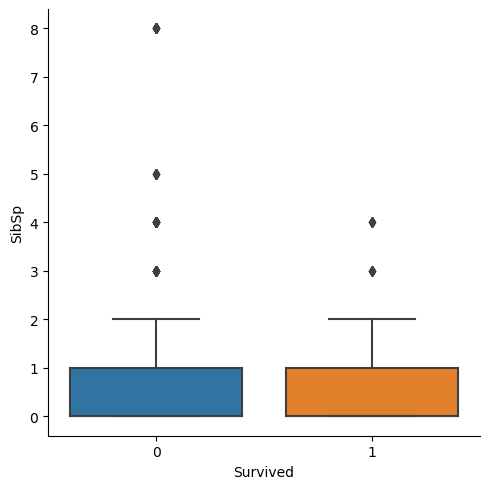

In [26]:
sns.catplot(data = df1, x ="Survived", y= "SibSp", kind = "box")

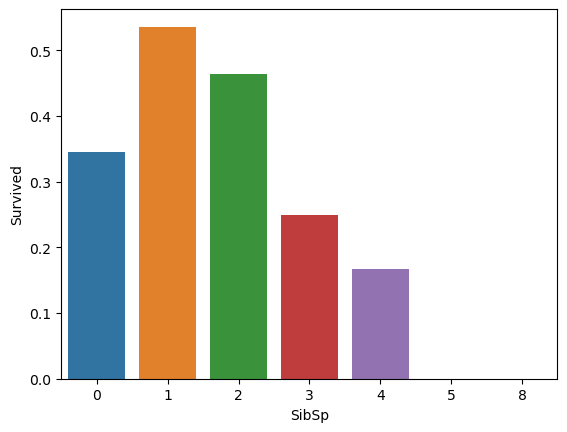

In [29]:
sns.barplot(x='SibSp', y='Survived', data=df1, ci=None)
plt.show()

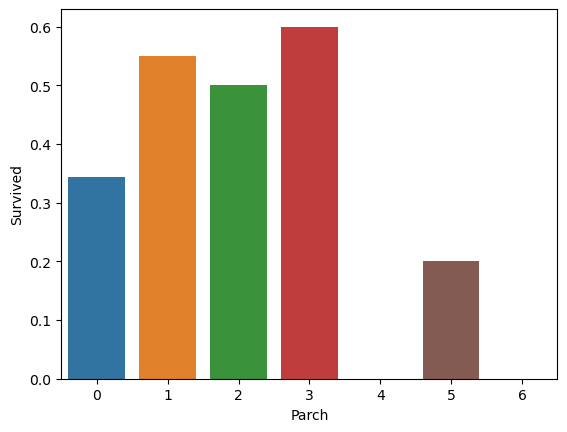

In [33]:
# create a contingency table
import scipy.stats as stats

contingency_table = pd.crosstab(df1['SibSp'], df['Survived'])

# perform chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

## The parch and SibSp seem to have a corrlation to Surrviving rate. However, they are not as significant as the previous two columns

In [105]:

X = df1[["Sex" , "Pclass" ]]

y = df1["Survived"]
X_test = df2[["Sex" , "Pclass" ]]


## For this classification problelm, i will chose the KNN model

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
X["Sex"] = le.fit_transform(X["Sex"])
X_test["Sex"] = le.fit_transform(X_test["Sex"])

In [107]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y)

KNeighborsClassifier(n_neighbors=3)

In [130]:
dfSub = pd.DataFrame()
dfSub["Survived"] = knn.predict(X_test)
ids =list(range(1,len(dfSub) +1))
dfSub["PassengerId"] = df2["PassengerId"]

dfSub=dfSub[["PassengerId" , "Survived"]]
dfSub.to_csv('Sub.csv', index=False)


### I will also get the accuracy of my model using the train split method

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [104]:
from sklearn.metrics import accuracy_score
val_predictions = knn.predict(X_val)

acc= (accuracy_score(y_val, val_predictions)/1) * 100
print("The accuracy of this model is: %.2f" %acc , "%")


The accuracy of this model is: 79.33 %




### Model's Results: 
* Accuracy Based on the Unsean dataset is **76.55 %**: ![alt text](re.png)

* Accuracy Based Train & Split method is **79.33%**